In [1]:
import os 
import json
import pandas as pd
import numpy as np
from datetime import datetime
import re

######################
from collections import Counter
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt          
import arabic_reshaper # this was missing in your code
from bidi.algorithm import get_display   # pip install python-bidi

################### Statistics , Hypothesis Testing 
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.stats import weightstats as stests
#################################### Machine learning Algorithms

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn import preprocessing 
from xgboost import XGBClassifier


C:\Users\asus\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\asus\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\asus\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def count_special_char(string): 
    special_char= 0 
    for i in range(0, len(string)):  
        ch = string[i]
        if (ch.isalpha() or ch.isdigit() or ch == ' '): 
            continue
        else: 
            special_char += 1
    return special_char

In [3]:
def string_to_json(r):
    while True:
        try:
            result = json.loads(r)   # try to parse...
            break
        except Exception as e:
            unexp = int(re.findall(r'\(char (\d+)\)', str(e))[0])
            r=r[:unexp]+r[unexp+1:]
    return result
########## Remove item from list ########
def remove(lis,item):
    if item in lis :
        lis.remove(item)
        return lis 
    else:
        return lis
################## ViZualisation Functions ###########
def plot_dist(years):
    year = Counter(years)
    year = dict(sorted(year.items(), key=lambda x: x[1], reverse=True))

    plt.figure(figsize=(10,10))
    X =year.keys()
    Y =year.values()
    y_pos = np.arange(len(X))
    bar1 = plt.bar(y_pos, Y, align='center', alpha=0.5,color = "#4d79ff")
    plt.xticks(y_pos, X,rotation=75)
    plt.ylabel('# User')
    ax.set_yscale('log')
    plt.title('User year of creation Dist')
    for rect in bar1:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    plt.show()
########### EXTRACT TWEETS AND USERS FEATURES ############
def get_tweet_user(tweet):
    twe_time     = tweet['created_at']
    twe_id       = tweet['id_str']
    text         = tweet['full_text']
    retw_cnt     = tweet['retweet_count']
    fav_cnt      = tweet['favorite_count']
    tweet_lang   = tweet['lang']
    user         = tweet['user']
    usr_desc    = user['description']
    usr_time     = user['created_at']
    usr_id       = user['id_str']
    usr_name     = user['name']
    usr_scr      = user['screen_name']
    usr_plac     = user['location']
    fllwrs_cnt   = user['followers_count']
    frnds_cnt    = user['friends_count']
    listed_cnt   = user['listed_count']
    usr_fav_cnt  = user['favourites_count']
    sts_cnt      = user['statuses_count']
    dflt_pro     = user['default_profile']
    has_url      = 0 if user['url']==None else 1
    verified     = user['verified']
    geo_enabled  = user['geo_enabled']
    hash_count  = len(tweet['entities']['hashtags'])
    hashtags = ''
    if hash_count > 0 :
        hashtags = [ t['text'].split('_') for t in tweet['entities']['hashtags']]
    try :
        url        = tweet['entities']['media'][0]['display_url']
        type_media = tweet['entities']['media'][0]['type']
    except Exception :
        url=''
        type_media = ''
    tweet_user =  [twe_id,twe_time,text,retw_cnt,fav_cnt,tweet_lang,usr_id,usr_time,usr_name,usr_scr,
                 usr_desc,usr_plac,fllwrs_cnt,frnds_cnt,listed_cnt,usr_fav_cnt,sts_cnt,dflt_pro,has_url,verified,
                  geo_enabled,hash_count,hashtags,type_media,url]
    return tweet_user

In [5]:
############### EXTRACT  RETWEETS FROM A CSV FiLE ########
def retweet(df):    
    retweet_feat=[]
    for i in range(df.shape[0]):
        r = df['retweet'][i]
        r = r.replace("'",'"')
        r = r.replace("False",'"False"')
        r = r.replace("True",'"True"')
        r = r.replace("None",'"None"')
        r = r.replace('href="','href')
        r = r.replace('" rel="','rel') 
        r = r.replace('ollow">','ollow')
        r=r.split('>, _json=',1)[1].split(', created_at=datetime.dat',1)[0]
        js = string_to_json(r)
        a = datetime.strptime(js['created_at'],'%a %b %d %H:%M:%S +0000 %Y')
        try :
            b = datetime.strptime(js['user']['created_at'],'%a %b %d %H:%M:%S +0000 %Y')
        except Exception :
            b = a
        c = a-b
        user = js['user']
        while True :
            try :
                retweet_feat.append([js['id'],js['retweeted_status']['id'],a,b,c,user['id'],user['name'],
                    user['screen_name'],user['location'],user['description'],
                    user['followers_count'],user['friends_count'],user['favourites_count'],
                    user['statuses_count'],user['listed_count'],user['default_profile'],user['url'],user['geo_enabled'],
                                  user['verified']])
                break
            except Exception as e :
                if str(e)[1:-1] == 'retweeted_status':
                    js[str(e)[1:-1]]={'id':''}
                else :
                    user[str(e)[1:-1]]=''
    return retweet_feat

############### EXTRACT RETWEET FEATURES  
def retweet_features(target='FAKE'):
    retweets_feature=[]
    for retweet_csv in remove(os.listdir("FND/ARACOV/"+target+'/retweets/'),'.ipynb_checkpoints'):
        df = pd.read_csv("FND/ARACOV/"+target+'/retweets/'+retweet_csv)
       # print(retweet_csv.split('csv')[0],df.shape)
        if df.shape[0] > 0 :
            f = retweet(df)
            retweets_feature.append(f)
    return retweets_feature

def norm(x):
    return (x - x.mean())/x.std()

In [6]:
########## TWEET EXTRACTION

columns = ['tweet_id','tweet_time','text','retweet_count','tweet_favorite','tweet_lang',
         'user_id','user_time','user_name','user_screen','user_description',
           'user_location','followers','friends','listed','user_favourites_count','statuses_count','default_profile','has_url',
          'verified','geo_enabled','hashtags_count','hashtags','type_media','url']

######### FAKE TWEETS
tweets_features = []
target = 'FAKE'
for tweet_json in remove(os.listdir("FND/ARACOV/"+target+'/tweets/'),'.ipynb_checkpoints'):
    with open("FND/ARACOV/"+target+'/tweets/'+tweet_json) as json_file:
        tweet = json.load(json_file)
    #a = datetime.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')
    f=get_tweet_user(tweet)
    tweets_features.append(f)
df_tweets_f = pd.DataFrame(tweets_features,columns=columns)

######### REAL TWEETS
tweets_features = []
target = 'REAL'
for tweet_json in remove(os.listdir("FND/ARACOV/"+target+'/tweets/'),'.ipynb_checkpoints'):
    with open("FND/ARACOV/"+target+'/tweets/'+tweet_json) as json_file:
        tweet = json.load(json_file)
    #a = datetime.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')
    f=get_tweet_user(tweet)
    tweets_features.append(f)
    
df_tweets_r = pd.DataFrame(tweets_features,columns=columns)



In [7]:
#RETWEET  EXTRACTION 
columns = ['retweet_id','tweet_id','retweet_time','user_time','difference_time','user_id',
         'user_name','user_screen','user_location','user_description',
           'followers','friends','user_favourites_count','statuses_count','listed','default_profile','has_url',
          'geo_enabled','verified']

############## REAL RETWEETS 
target = 'REAL'
retweets = retweet_features(target=target)
df_retweets_r = pd.DataFrame(columns =columns )
for tweet in retweets :
    df_ret = pd.DataFrame(tweet,columns =columns )
    df_retweets_r = pd.concat([df_retweets_r,df_ret],ignore_index= True)
############### FAKE RETWEETS
target = 'FAKE'
retweets = retweet_features(target=target)
df_retweets_f = pd.DataFrame(columns =columns )
for tweet in retweets :
    df_ret = pd.DataFrame(tweet,columns =columns )
    df_retweets_f = pd.concat([df_retweets_f,df_ret],ignore_index= True)

#################################
df_tweets = pd.concat([df_tweets_r,df_tweets_f],ignore_index= True)
df_retweets = pd.concat([df_retweets_r,df_retweets_f],ignore_index= True)


In [8]:

print("FAKE TWEETS   : ",df_tweets_f.shape,'   ', "    REAL TWEETS   :",df_tweets_r.shape)
print("FAKE RETWEETS : ",df_retweets_f.shape,'   ',"REAL RETWEETS :",df_retweets_r.shape)


FAKE TWEETS   :  (1478, 25)         REAL TWEETS   : (1650, 25)
FAKE RETWEETS :  (5564, 19)     REAL RETWEETS : (9709, 19)


In [9]:
####  Registration age
df_tweets_f['tweet_time'] = df_tweets_f['tweet_time'].apply(lambda x : datetime.strptime(x,'%a %b %d %H:%M:%S +0000 %Y'))
df_tweets_f['user_time'] = df_tweets_f['user_time'].apply(lambda x : datetime.strptime(x,'%a %b %d %H:%M:%S +0000 %Y'))
df_tweets_f['register_age'] = df_tweets_f['tweet_time'] - df_tweets_f['user_time']
df_tweets_f['register_age'] = df_tweets_f['register_age'].apply(lambda x : x.days  + x.seconds/(60*24))


df_tweets_r['tweet_time'] = df_tweets_r['tweet_time'].apply(lambda x : datetime.strptime(x,'%a %b %d %H:%M:%S +0000 %Y'))
df_tweets_r['user_time'] = df_tweets_r['user_time'].apply(lambda x : datetime.strptime(x,'%a %b %d %H:%M:%S +0000 %Y'))
df_tweets_r['register_age'] = df_tweets_r['tweet_time'] - df_tweets_r['user_time']
df_tweets_r['register_age'] = df_tweets_r['register_age'].apply(lambda x : x.days  + x.seconds/(60*24))


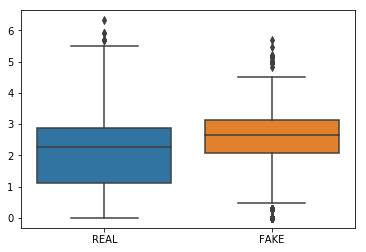

In [10]:
import seaborn as sns

data = pd.concat([df_tweets_r['friends'].apply(lambda x : math.log10(x+1)),df_tweets_f['friends'].apply(lambda x : math.log10(x+1))],axis = 1)
data.columns.values[0] = 'REAL'
data.columns.values[1] = 'FAKE'
sns.boxplot(data=data)

FAKE TWEETS :  1478               REAL TWEETS : 1650


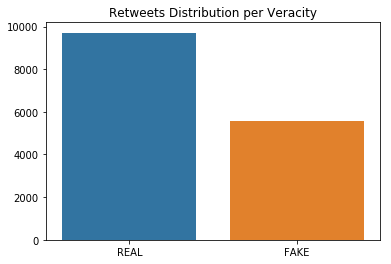

In [11]:

sns.barplot(y=[df_retweets_r.shape[0],df_retweets_f.shape[0]], x =['REAL','FAKE'])
#sns.barplot(y=uid_f,x=['UNVERIFIED','VERIFIED'] )
plt.title("Retweets Distribution per Veracity")

print("FAKE TWEETS : ",df_tweets_f.shape[0],'             ',"REAL TWEETS :",df_tweets_r.shape[0])


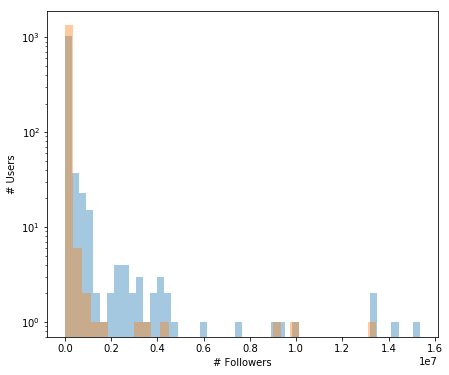

In [12]:


# For each user id, get its number of followers
uids = np.unique(df_tweets_r['user_id'].values)
nums_r = np.zeros(uids.shape)
for idx,uid in enumerate(uids):
    followerCt = df_tweets_r[ df_tweets_r['user_id']==uid ]['followers'].values
    if followerCt.shape[0] == 0:
        continue
    nums_r[idx] = followerCt[0]


uids = np.unique(df_tweets_f['user_id'].values)
nums_f = np.zeros(uids.shape)
for idx,uid in enumerate(uids):
    followerCt = df_tweets_r[ df_tweets_r['user_id']==uid ]['followers'].values
    if followerCt.shape[0] == 0:
        continue
    nums_f[idx] = followerCt[0]

plt.figure(figsize=(7,6))
ax  = sns.distplot(nums_r, hist=True, kde=False, rug=False, fit=None, norm_hist=False)
ax1 = sns.distplot(nums_f, hist=True, kde=False, rug=False, fit=None, norm_hist=False)
plt.xlabel('# Followers')
plt.ylabel('# Users')
#ax.set_xscale('log')
ax.set_yscale('log')
ax1.set_yscale('log')
plt.show()

1130


Text(0.5, 1.0, 'UNIQUE SOURCE USERS')

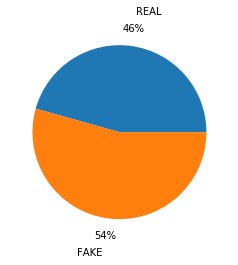

In [13]:
uid_f = df_tweets_f['user_id'].nunique()
uid_r = df_tweets_r['user_id'].nunique()
print(uid_r)
plt.pie([uid_r,uid_f], labels =['REAL','FAKE'] , autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("UNIQUE SOURCE USERS")
#ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

FAKE TWEETS :  1478               REAL TWEETS : 1650
UNIQUE FAKE SOURCE USERS :  1346      UNIQUE REAL SOURCE USERS : 1130


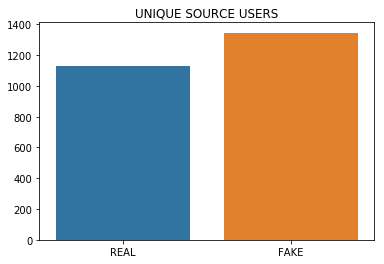

In [14]:
uid_f = df_tweets_f['user_id'].nunique()
uid_r = df_tweets_r['user_id'].nunique()
sns.barplot(y=[uid_r,uid_f], x =['REAL','FAKE'])
#sns.barplot(y=uid_f,x=['UNVERIFIED','VERIFIED'] )
plt.title("UNIQUE SOURCE USERS")

print("FAKE TWEETS : ",df_tweets_f.shape[0],'             ',"REAL TWEETS :",df_tweets_r.shape[0])
print("UNIQUE FAKE SOURCE USERS : ",uid_f,'   '," UNIQUE REAL SOURCE USERS :",uid_r)

FAKE RETWEETS :  5564     REAL RETWEETS : 9709
UNIQUE FAKE SPREADERS :  5147      UNIQUE REAL SPREADERS : 8566


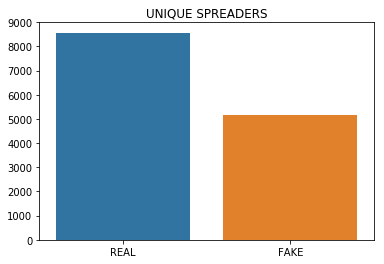

In [15]:

ret_uid_f = df_retweets_f['user_id'].nunique()
ret_uid_r = df_retweets_r['user_id'].nunique()
sns.barplot(y=[ret_uid_r,ret_uid_f], x =['REAL','FAKE'])
#sns.barplot(y=uid_f,x=['UNVERIFIED','VERIFIED'] )
plt.title("UNIQUE SPREADERS")

print("FAKE RETWEETS : ",df_retweets_f.shape[0],'   ',"REAL RETWEETS :",df_retweets_r.shape[0])
print("UNIQUE FAKE SPREADERS : ",ret_uid_f,'   '," UNIQUE REAL SPREADERS :",ret_uid_r)

Text(0.5, 1.0, 'REAL USERS')

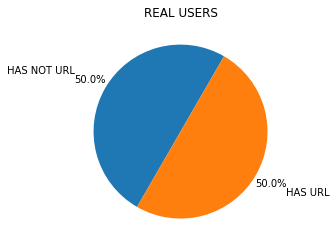

In [16]:
uid_f = df_tweets_f.groupby(['has_url'])['user_id'].nunique()
uid_r = df_tweets_r.groupby(['has_url'])['user_id'].nunique()

#sns.barplot(y=uid_r, x =['UNVERIFIED','VERIFIED'] )
#sns.barplot(y=uid_f,x= )

plt.pie(uid_r , labels =['HAS NOT URL','HAS URL'] , autopct='%1.1f%%', 
       shadow=False, startangle=60,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')

plt.title("REAL USERS")

Text(0.5, 1.0, ' FAKE USERS')

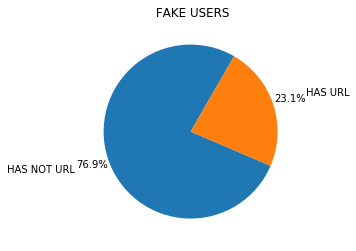

In [17]:

plt.pie(uid_f , labels =['HAS NOT URL','HAS URL'] , autopct='%1.1f%%', 
       shadow=False, startangle=60,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')

plt.title(" FAKE USERS")

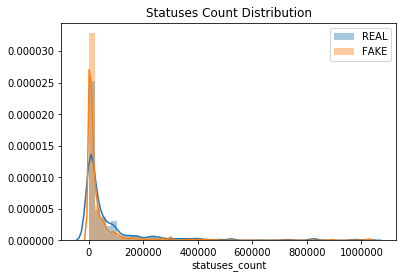

In [18]:
sns.distplot(df_tweets_r['statuses_count'],bins=50,label = 'REAL')
sns.distplot(df_tweets_f['statuses_count'],bins=50,label = 'FAKE')
plt.title("Statuses Count Distribution")
plt.legend(loc='upper right')
plt.show()

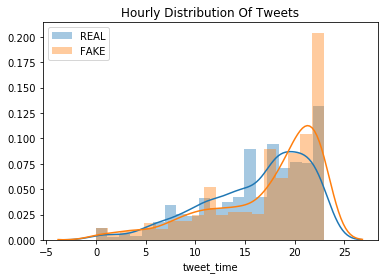

In [20]:
sns.distplot(df_tweets_r["tweet_time"].dt.hour,label = 'REAL')
sns.distplot(df_tweets_f["tweet_time"].dt.hour,label = 'FAKE')
plt.title("Hourly Distribution Of Tweets")
plt.legend(loc='upper left')
plt.show()

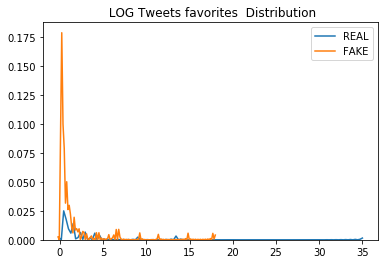

In [21]:
sns.kdeplot(norm(df_tweets_r["tweet_favorite"]),label = 'REAL')
sns.kdeplot(norm(df_tweets_f["tweet_favorite"]),label = 'FAKE')
plt.title(" LOG Tweets favorites  Distribution")
plt.legend(loc='upper right')
plt.show()

In [ ]:
sns.kdeplot(df_tweets_r["retweet_count"],label = 'REAL')
sns.kdeplot(df_tweets_f["retweet_count"],label = 'FAKE')
plt.title(" Retweets Counts  Distribution")
plt.legend(loc='upper right')
plt.show()

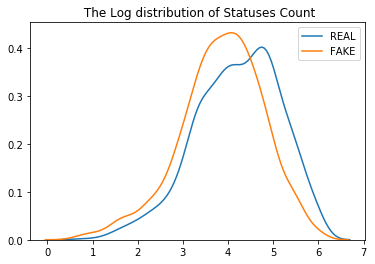

In [25]:
sns.kdeplot(df_tweets_r["statuses_count"].apply(lambda x : math.log10(x+1)),label = 'REAL')
sns.kdeplot(df_tweets_f["statuses_count"].apply(lambda x : math.log10(x+1)),label = 'FAKE')
plt.title(" The Log distribution of Statuses Count")
plt.legend(loc='upper right')
plt.show()

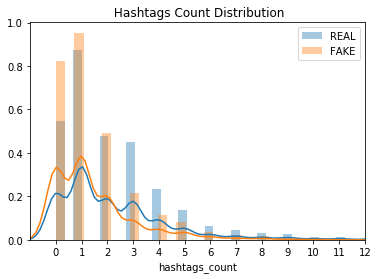

In [26]:
sns.distplot(df_tweets_r["hashtags_count"],label = 'REAL')
sns.distplot(df_tweets_f["hashtags_count"],label = 'FAKE')
plt.title(" Hashtags Count Distribution")
plt.legend(loc='upper right')
plt.xlim([-1, 12])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

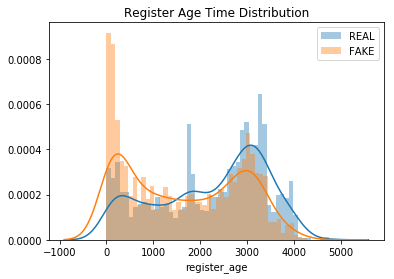

In [27]:
sns.distplot(df_tweets_r['register_age'],bins = 50 ,label = 'REAL')
sns.distplot(df_tweets_f['register_age'],bins = 50,label = 'FAKE')
plt.title("Register Age Time Distribution")
plt.legend(loc='upper right')
plt.show()

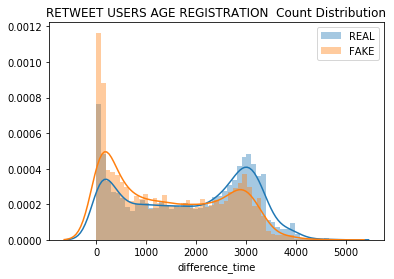

In [28]:
sns.distplot(df_retweets_r['difference_time'].apply(lambda x: x.days + x.seconds/(24*360)),bins=50,label = 'REAL')
sns.distplot(df_retweets_f['difference_time'].apply(lambda x: x.days + x.seconds/(24*360)),bins=50,label = 'FAKE')
plt.title("RETWEET USERS AGE REGISTRATION  Count Distribution")
plt.legend(loc='upper right')
plt.show()

In [29]:
df_retweets_r.drop([ 1319, 1550,8713],inplace = True)
df_retweets_f.drop([ 52, 57,2333,4953,5524],inplace = True)

tim = []
for i, ret in df_retweets_f.iterrows() :
    t1 =   ret['retweet_time']
    t2 =   df_tweets_f[df_tweets_f['tweet_id'] == str(ret['tweet_id']) ]  ['tweet_time'].iloc[0]
    tim.append(t1 - t2)

df_retweets_f['prop_time'] = [ t.days * 1440 + t.seconds*60 for t in tim ]

tim = []
for i, ret in df_retweets_r.iterrows() :
    t1 =   ret['retweet_time']
    t2 =   df_tweets_r[df_tweets_r['tweet_id'] == str(ret['tweet_id']) ]  ['tweet_time'].iloc[0]
    tim.append(t1 - t2)

    
df_retweets_r['prop_time'] = [ t.days * 1440 + t.seconds*60 for t in tim ]

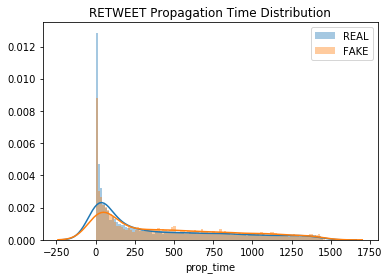

In [30]:

sns.distplot(df_retweets_r['prop_time'] / (60*60),bins=100,label = 'REAL')
sns.distplot(df_retweets_f['prop_time'] / (60*60),bins=100,label = 'FAKE')
plt.title("RETWEET Propagation Time Distribution")
plt.legend(loc='upper right')
plt.show()

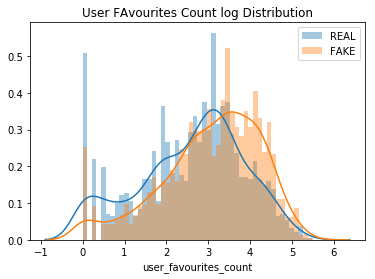

In [31]:
sns.distplot(df_tweets_r['user_favourites_count'].apply(lambda x : math.log10(x+1)),bins=50,label = 'REAL')
sns.distplot(df_tweets_f['user_favourites_count'].apply(lambda x : math.log10(x+1)),bins=50,label = 'FAKE')
plt.title("User FAvourites Count log Distribution")
plt.legend(loc='upper right')
plt.show()

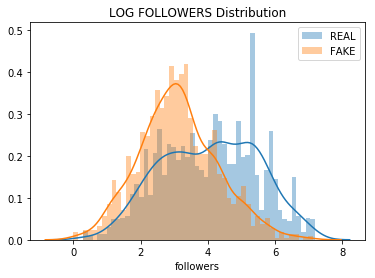

In [32]:
sns.distplot(df_tweets_r['followers'].apply(lambda x : math.log10(x+1) ),bins=50,label = 'REAL')
sns.distplot(df_tweets_f['followers'].apply(lambda x : math.log10(x+1) ),bins=50,label = 'FAKE')
plt.title("LOG FOLLOWERS Distribution")
plt.legend(loc='upper right')
plt.show()

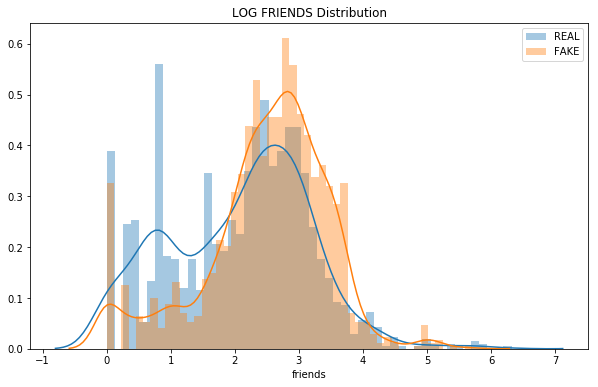

In [33]:
plt.figure(figsize = (10,6))
sns.distplot(df_tweets_r['friends'].apply(lambda x : math.log10(x+1) ),bins=50,label = 'REAL')
sns.distplot(df_tweets_f['friends'].apply(lambda x : math.log10(x+1) ),bins=50,label = 'FAKE')
#sns.distplot(df_tweets['friends'].apply(lambda x : math.log10(x+1) ),bins=50,label = 'ALL')

plt.title("LOG FRIENDS Distribution")
plt.legend(loc='upper right')
plt.show()

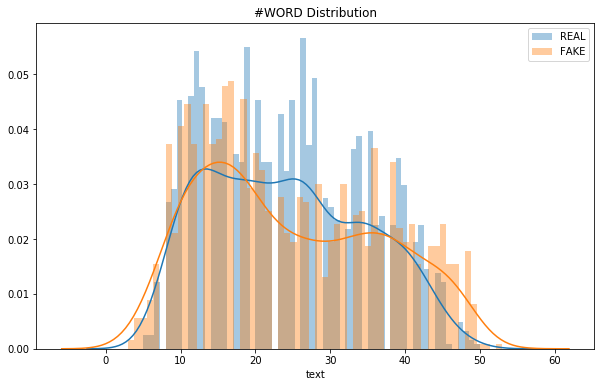

In [34]:
plt.figure(figsize = (10,6))
sns.distplot(df_tweets_r['text'].apply(lambda x : len(set(x.split(' ') ))),bins=60,label = 'REAL')
sns.distplot(df_tweets_f['text'].apply(lambda x : len(set(x.split(' ') ))),bins=60,label = 'FAKE')
#sns.distplot(df_tweets['text'].apply(lambda x : len(x.split(' ') )),bins=50,label = 'ALL')
plt.title("#WORD Distribution")
plt.legend(loc='upper right')

plt.show()

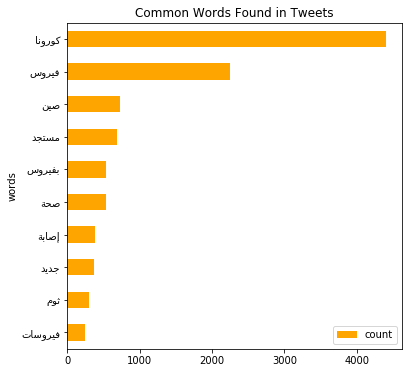

In [42]:
import collections
word_freq = collections.Counter(data.split(' '))

word_freq = pd.DataFrame(word_freq.most_common(10),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(6, 6))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="orange")

ax.set_title("Common Words Found in Tweets")

plt.show()

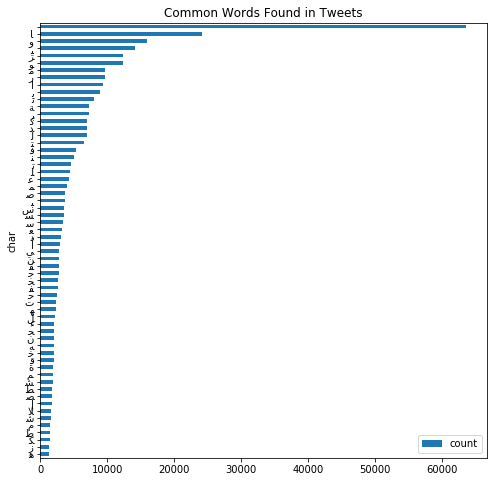

In [41]:
import collections
word_freq = collections.Counter(data)

word_freq = pd.DataFrame(word_freq.most_common(60),
                             columns=['char', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='char',
                      y='count',
                      ax=ax)

ax.set_title("Common Words Found in Tweets")

plt.show()

In [38]:
def remove_stp_words(text):
    text_words = []
    words = text.split(" ")
    stop_words = get_stop_words()
    for word in words:
        if word not in stop_words:
            text_words.append(word)
    return ' '.join(text_words)
##########################################
def get_stop_words():
    path = "arabic_stp_words.txt"
    stop_words = []
    with open(path, "r", encoding="utf-8", errors="ignore") as myfile:
        stop_words = myfile.readlines()
    stop_words = [word.strip() for word in stop_words]
    return stop_words
#############################################
def norm_alif_waw(text):
    text_words = []
    words = text.split(" ")
    for c in words:
        if len(c)>2 :
            if c[0] == 'و' and c[1] == "ل" and c[2] == "ا" : 
                c=list(c)
                c[0]=""
                c[1]=""
                c[2]=""
                c=''.join(c)
        if len(c) > 1 :
            if c[1] == "ل" and c[0] == "ا":
                c=list(c)
                c[0]=""
                c[1]=""
                c=''.join(c)
               # c = re.sub(" ","و", c) # yaa' with 'alif maqSuura
        text_words.append(c)
    return ' '.join(text_words)

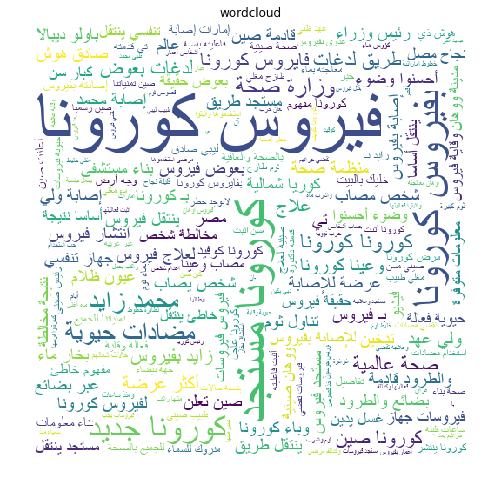

In [40]:

from wordcloud import WordCloud
# Reads 
dftext  = df_tweets['text'].replace('[^\u0600-\u06ff]', ' ', regex=True, inplace=False)
dftext.replace('[\u060C]+|[\u060D]+|[\u061B]+|[\u061E]+|[\u061F]+|[\u066A]+|[\u066B]+'+
         '|[\u066C]+|[\u066D]+|[\u060C]+|[\u06D4]', ' ', regex=True, inplace=True)

comment_words = ' '
for val in dftext: 
    # split the value 
    tokens = val.split()     
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
'''
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(comment_words) 
  '''
import matplotlib.pyplot as plt          
# -- Arabic text dependencies
import arabic_reshaper # this was missing in your code
from bidi.algorithm import get_display   # pip install python-bidi
comment_words = norm_alif_waw(comment_words)
comment_words = remove_stp_words(comment_words)
data = arabic_reshaper.reshape(comment_words)
data = get_display(data) # add this line
WordCloud = WordCloud(font_path='arial', background_color='white',
                  mode='RGB', width=500, height= 500 ).generate(data)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("wordcloud")
plt.imshow(WordCloud)
plt.axis("off")
plt.show()

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(dftext, df_tweets['target'], 
                                                    test_size=0.2, random_state=1)
vectorizer = TfidfVectorizer(ngram_range = (1,2))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print(X_train.shape,X_test.shape)

(2502, 38259) (626, 38259)


In [45]:
######## ADD FEATURES ##########
df_tweets_f['geo_enabled'] = df_tweets_f['geo_enabled'].apply(lambda x : 1 if x==True else 0)
df_tweets_f['verified'] = df_tweets_f['verified'].apply(lambda x : 1 if x==True else 0)
df_tweets_f['default_profile'] = df_tweets_f['default_profile'].apply(lambda x : 1 if x==True else 0)
df_tweets_f['user_name_len'] = [ len(x) for x in df_tweets_f['user_name'] ]
df_tweets_f['user_screen_len'] = [ len(x) for x in df_tweets_f['user_screen'] ]
df_tweets_f['user_description_len'] = [ len(x) for x in df_tweets_f['user_description'] ]
df_tweets_f['text_len'] = [ len(x) for x in df_tweets_f['text'] ]
df_tweets_f['word_count'] = [ len(x.split(' ')) for x in df_tweets_f['text'] ]
df_tweets_f['unique_char'] = [len(set(x)) for x in   df_tweets_f['text'] ]
df_tweets_f['special_char'] = [ count_special_char(x) for x in df_tweets_f['text'] ]
df_tweets_f['has_media'] = df_tweets_f['type_media'].apply(lambda x : 0 if x =='' else 1)
df_tweets_f['has_location'] = df_tweets_f['user_location'].apply(lambda x : 0 if x =='' else 1)


df_tweets_r['geo_enabled'] = df_tweets_r['geo_enabled'].apply(lambda x : 1 if x==True else 0)
df_tweets_r['verified'] = df_tweets_r['verified'].apply(lambda x : 1 if x==True else 0)
df_tweets_r['default_profile'] = df_tweets_r['default_profile'].apply(lambda x : 1 if x==True else 0)
df_tweets_r['user_name_len'] = [ len(x) for x in df_tweets_r['user_name'] ]
df_tweets_r['user_screen_len'] = [ len(x) for x in df_tweets_r['user_screen'] ]
df_tweets_r['user_description_len'] = [ len(x) for x in df_tweets_r['user_description'] ]
df_tweets_r['text_len'] = [ len(x) for x in df_tweets_r['text'] ]
df_tweets_r['word_count'] = [ len(x.split(' ')) for x in df_tweets_r['text'] ]
df_tweets_r['unique_char'] = [len(set(x)) for x in   df_tweets_r['text'] ]
df_tweets_r['special_char'] = [ count_special_char(x) for x in df_tweets_r['text'] ]
df_tweets_r['has_media'] = df_tweets_r['type_media'].apply(lambda x : 0 if x =='' else 1)
df_tweets_r['has_location'] = df_tweets_r['user_location'].apply(lambda x : 0 if x =='' else 1)


df_tweets_r['followers'] = df_tweets_r['followers'].apply(lambda x : math.log10(x+1))
df_tweets_r['friends'] = df_tweets_r['friends'].apply(lambda x : math.log10(x+1))
df_tweets_r['listed'] = df_tweets_r['listed'].apply(lambda x : math.log10(x+1))
df_tweets_r['user_favourites_count'] = df_tweets_r['user_favourites_count'].apply(lambda x : math.log10(x+1))
df_tweets_r['statuses_count'] = df_tweets_r['statuses_count'].apply(lambda x : math.log10(x+1))
df_tweets_r['tweet_favorite'] = df_tweets_r['tweet_favorite'].apply(lambda x : math.log10(x+1))
df_tweets_r['retweet_count'] = df_tweets_r['retweet_count'].apply(lambda x : math.log10(x+1))
#df_tweets_r['diff_time'] = df_tweets_r['diff_time'].apply(lambda x : x.days*24 + x.seconds/60  )
df_tweets_r['register_age'] = df_tweets_r['register_age'].apply(lambda x :(x - df_tweets_r['register_age'].mean()) / df_tweets_r['register_age'].std())



df_tweets_f['followers'] = df_tweets_f['followers'].apply(lambda x : math.log10(x+1))
df_tweets_f['friends'] = df_tweets_f['friends'].apply(lambda x : math.log10(x+1))
df_tweets_f['listed'] = df_tweets_f['listed'].apply(lambda x : math.log10(x+1))
df_tweets_f['user_favourites_count'] = df_tweets_f['user_favourites_count'].apply(lambda x : math.log10(x+1))
df_tweets_f['statuses_count'] = df_tweets_f['statuses_count'].apply(lambda x : math.log10(x+1))
df_tweets_f['tweet_favorite'] = df_tweets_f['tweet_favorite'].apply(lambda x : math.log10(x+1))
df_tweets_f['retweet_count'] = df_tweets_f['retweet_count'].apply(lambda x : math.log10(x+1))
#df_tweets_f['diff_time'] = df_tweets_f['diff_time'].apply(lambda x :x.days*24 + x.seconds/60 )
df_tweets_f['register_age'] = df_tweets_f['register_age'].apply(lambda x :(x - df_tweets_f['register_age'].mean()) / df_tweets_f['register_age'].std())

print(df_tweets_r.columns)

Index(['tweet_id', 'tweet_time', 'text', 'retweet_count', 'tweet_favorite',
       'tweet_lang', 'user_id', 'user_time', 'user_name', 'user_screen',
       'user_description', 'user_location', 'followers', 'friends', 'listed',
       'user_favourites_count', 'statuses_count', 'default_profile', 'has_url',
       'verified', 'geo_enabled', 'hashtags_count', 'hashtags', 'type_media',
       'url', 'register_age', 'user_name_len', 'user_screen_len',
       'user_description_len', 'text_len', 'word_count', 'unique_char',
       'special_char', 'has_media', 'has_location'],
      dtype='object')


In [46]:
df_tweets_f['followers_ratio'] = None
for idd in df_tweets_f['tweet_id'] :
    df_medium = df_retweets_f[df_retweets_f['tweet_id']==int(idd)]
    listed = df_medium['followers'].apply(lambda x : math.log10(x+1)).mean()
    df_tweets_f.loc[df_tweets_f['tweet_id']==idd,['followers_ratio']] = listed

In [47]:
df_tweets_f['default_profile_ratio'] = None
df_tweets_f['reg_age_ratio'] = None
df_tweets_f['len_name_ratio'] = None
df_tweets_f['len_screen_ratio'] = None
df_tweets_f['len_descr_ratio'] = None
df_tweets_f['friends_ratio'] = None
df_tweets_f['followers_ratio'] = None
df_tweets_f['favorites_ratio'] = None 
df_tweets_f['statuses_ratio'] = None 
df_tweets_f['has_url_ratio'] = None
df_tweets_f['verified_ratio'] = None
df_tweets_f['geo_ratio'] = None
df_tweets_f['listed_ratio'] = None
df_tweets_f['has_loc'] = None


for idd in df_tweets_f['tweet_id'] :
    df_medium = df_retweets_f[df_retweets_f['tweet_id']==int(idd)] 
    reg_age = df_medium['difference_time'].apply(lambda x : x.days*24 + x.seconds/60 ).mean()
    user_name = df_medium['user_name'].apply(lambda x : len(x) ).mean()
    screen_name = df_medium['user_screen'].apply(lambda x : len(x) ).mean()
    user_desc = df_medium['user_description'].apply(lambda x : len(x) ).mean()
    
    dft_pro = df_medium['default_profile'].apply(lambda x : 0 if x =='False' else 1 ).mean()
    ver  = df_medium['verified'].apply(lambda x : 0 if x =='False' else 1 ).mean()
    geo  = df_medium['geo_enabled'].apply(lambda x : 0 if x =='False' else 1 ).mean()
    friends = df_medium['friends'].apply(lambda x : math.log10(x+1)).mean()
    followers = df_medium['followers'].apply(lambda x : math.log10(x+1)).mean()
    listed = df_medium['listed'].apply(lambda x : math.log10(x+1)).mean()
    fav = df_medium['user_favourites_count'].apply(lambda x : math.log10(x+1)).mean()
    stat = df_medium['statuses_count'].apply(lambda x : math.log10(x+1)).mean()
    hasurl = df_medium['has_url'].apply(lambda x : 0 if x == 'None' else 1 ).mean()
    hasloc = df_medium['user_location'].apply(lambda x : 0 if x == '' else 1 ).mean()

    
    df_tweets_f.loc[df_tweets_f['tweet_id']==idd,['default_profile_ratio']] = dft_pro
    df_tweets_f.loc[df_tweets_f['tweet_id']==idd,['reg_age_ratio']] = reg_age if type(reg_age) != pd._libs.tslibs.nattype.NaTType  else np.nan
    df_tweets_f.loc[df_tweets_f['tweet_id']==idd,['len_name_ratio']] = user_name
    df_tweets_f.loc[df_tweets_f['tweet_id']==idd,['len_screen_ratio']] = screen_name
    df_tweets_f.loc[df_tweets_f['tweet_id']==idd,['len_descr_ratio']] = user_desc
    df_tweets_f.loc[df_tweets_f['tweet_id']==idd,['friends_ratio']] = friends
    df_tweets_f.loc[df_tweets_f['tweet_id']==idd,['followers_ratio']] = followers
    df_tweets_f.loc[df_tweets_f['tweet_id']==idd,['favorites_ratio']] = fav
    df_tweets_f.loc[df_tweets_f['tweet_id']==idd,['statuses_ratio']] = stat
    df_tweets_f.loc[df_tweets_f['tweet_id']==idd,['has_url_ratio']] = hasurl
    df_tweets_f.loc[df_tweets_f['tweet_id']==idd,['verified_ratio']] = ver
    df_tweets_f.loc[df_tweets_f['tweet_id']==idd,['geo_ratio']] = geo
    df_tweets_f.loc[df_tweets_f['tweet_id']==idd,['listed_ratio']] = listed 
    df_tweets_f.loc[df_tweets_f['tweet_id']==idd,['has_loc']] = hasloc
    
    
df_tweets_f.columns


Index(['tweet_id', 'tweet_time', 'text', 'retweet_count', 'tweet_favorite',
       'tweet_lang', 'user_id', 'user_time', 'user_name', 'user_screen',
       'user_description', 'user_location', 'followers', 'friends', 'listed',
       'user_favourites_count', 'statuses_count', 'default_profile', 'has_url',
       'verified', 'geo_enabled', 'hashtags_count', 'hashtags', 'type_media',
       'url', 'register_age', 'user_name_len', 'user_screen_len',
       'user_description_len', 'text_len', 'word_count', 'unique_char',
       'special_char', 'has_media', 'has_location', 'followers_ratio',
       'default_profile_ratio', 'reg_age_ratio', 'len_name_ratio',
       'len_screen_ratio', 'len_descr_ratio', 'friends_ratio',
       'favorites_ratio', 'statuses_ratio', 'has_url_ratio', 'verified_ratio',
       'geo_ratio', 'listed_ratio', 'has_loc'],
      dtype='object')

In [48]:
df_tweets_r['default_profile_ratio'] = None
df_tweets_r['reg_age_ratio'] = None
df_tweets_r['len_name_ratio'] = None
df_tweets_r['len_screen_ratio'] = None
df_tweets_r['len_descr_ratio'] = None
df_tweets_r['friends_ratio'] = None
df_tweets_r['followers_ratio'] = None
df_tweets_r['favorites_ratio'] = None 
df_tweets_r['statuses_ratio'] = None 
df_tweets_r['has_url_ratio'] = None
df_tweets_r['verified_ratio'] = None
df_tweets_r['geo_ratio'] = None
df_tweets_r['listed_ratio'] = None
df_tweets_r['has_loc'] = None


for idd in df_tweets_r['tweet_id'] :
    df_medium = df_retweets_r[df_retweets_r['tweet_id']==int(idd)]
    reg_age = df_medium['difference_time'].apply(lambda x : x.days*24 + x.seconds/60 ).mean()
    user_name = df_medium['user_name'].apply(lambda x : len(x) ).mean()
    screen_name = df_medium['user_screen'].apply(lambda x : len(x) ).mean()
    user_desc = df_medium['user_description'].apply(lambda x : len(x) ).mean()
    
    dft_pro = df_medium['default_profile'].apply(lambda x : 0 if x =='False' else 1 ).mean()
    fav  = df_medium['default_profile'].apply(lambda x : 0 if x =='False' else 1 ).mean()
    ver  = df_medium['verified'].apply(lambda x : 0 if x =='False' else 1 ).mean()
    geo  = df_medium['geo_enabled'].apply(lambda x : 0 if x =='False' else 1 ).mean()
    friends = df_medium['friends'].apply(lambda x : math.log10(x+1)).mean()
    followers = df_medium['followers'].apply(lambda x : math.log10(x+1)).mean()
    listed = df_medium['listed'].apply(lambda x : math.log10(x+1)).mean()
    fav = df_medium['user_favourites_count'].apply(lambda x : math.log10(x+1)).mean()
    stat = df_medium['statuses_count'].apply(lambda x : math.log10(x+1)).mean()
    hasurl = df_medium['has_url'].apply(lambda x : 0 if x == 'None' else 1 ).mean()
    hasloc = df_medium['user_location'].apply(lambda x : 0 if x == '' else 1 ).mean()

    
    df_tweets_r.loc[df_tweets_r['tweet_id']==idd,['default_profile_ratio']] = dft_pro
    df_tweets_r.loc[df_tweets_r['tweet_id']==idd,['reg_age_ratio']] = reg_age if type(reg_age) != pd._libs.tslibs.nattype.NaTType  else np.nan
    df_tweets_r.loc[df_tweets_r['tweet_id']==idd,['len_name_ratio']] = user_name
    df_tweets_r.loc[df_tweets_r['tweet_id']==idd,['len_screen_ratio']] = screen_name
    df_tweets_r.loc[df_tweets_r['tweet_id']==idd,['len_descr_ratio']] = user_desc
    df_tweets_r.loc[df_tweets_r['tweet_id']==idd,['friends_ratio']] = friends
    df_tweets_r.loc[df_tweets_r['tweet_id']==idd,['followers_ratio']] = followers
    df_tweets_r.loc[df_tweets_r['tweet_id']==idd,['favorites_ratio']] = fav
    df_tweets_r.loc[df_tweets_r['tweet_id']==idd,['statuses_ratio']] = stat
    df_tweets_r.loc[df_tweets_r['tweet_id']==idd,['has_url_ratio']] = hasurl
    df_tweets_r.loc[df_tweets_r['tweet_id']==idd,['verified_ratio']] = ver
    df_tweets_r.loc[df_tweets_r['tweet_id']==idd,['geo_ratio']] = geo
    df_tweets_r.loc[df_tweets_r['tweet_id']==idd,['listed_ratio']] = listed 
    df_tweets_r.loc[df_tweets_r['tweet_id']==idd,['has_loc']] = hasloc
    
    
df_tweets_r.columns

Index(['tweet_id', 'tweet_time', 'text', 'retweet_count', 'tweet_favorite',
       'tweet_lang', 'user_id', 'user_time', 'user_name', 'user_screen',
       'user_description', 'user_location', 'followers', 'friends', 'listed',
       'user_favourites_count', 'statuses_count', 'default_profile', 'has_url',
       'verified', 'geo_enabled', 'hashtags_count', 'hashtags', 'type_media',
       'url', 'register_age', 'user_name_len', 'user_screen_len',
       'user_description_len', 'text_len', 'word_count', 'unique_char',
       'special_char', 'has_media', 'has_location', 'default_profile_ratio',
       'reg_age_ratio', 'len_name_ratio', 'len_screen_ratio',
       'len_descr_ratio', 'friends_ratio', 'followers_ratio',
       'favorites_ratio', 'statuses_ratio', 'has_url_ratio', 'verified_ratio',
       'geo_ratio', 'listed_ratio', 'has_loc'],
      dtype='object')

In [49]:
df_tweets_f['target'] = 0 
df_tweets_r['target'] = 1

df_tweets = pd.concat([df_tweets_f,df_tweets_r],ignore_index=True)
for col in df_tweets_f.columns[33:] :
    print(col)
    df_tweets_f[col].fillna( df_tweets_f[col].mean(),inplace=True)
    df_tweets_r[col].fillna( df_tweets_r[col].mean(),inplace=True)
    df_tweets[col].fillna( df_tweets[col].mean(),inplace=True)


has_media
has_location
followers_ratio
default_profile_ratio
reg_age_ratio
len_name_ratio
len_screen_ratio
len_descr_ratio
friends_ratio
favorites_ratio
statuses_ratio
has_url_ratio
verified_ratio
geo_ratio
listed_ratio
has_loc
target


In [50]:
df_tweets_ML = df_tweets.drop(['target','text','hashtags', 'tweet_id', 'tweet_time' , 'user_id','user_time','user_name',
                               'user_screen','user_description','user_location','type_media','tweet_lang',
                               'url'], axis=1)

In [51]:
df_tweets_ML.isnull().sum()


retweet_count            0
tweet_favorite           0
followers                0
friends                  0
listed                   0
user_favourites_count    0
statuses_count           0
default_profile          0
has_url                  0
verified                 0
geo_enabled              0
hashtags_count           0
register_age             0
user_name_len            0
user_screen_len          0
user_description_len     0
text_len                 0
word_count               0
unique_char              0
special_char             0
has_media                0
has_location             0
followers_ratio          0
default_profile_ratio    0
reg_age_ratio            0
len_name_ratio           0
len_screen_ratio         0
len_descr_ratio          0
friends_ratio            0
favorites_ratio          0
statuses_ratio           0
has_url_ratio            0
verified_ratio           0
geo_ratio                0
listed_ratio             0
has_loc                  0
dtype: int64

In [56]:

X_train , X_test , y_train , y_test = train_test_split(df_tweets_ML, df_tweets['target'], test_size=0.2, random_state=0)

print(X_train.shape,X_test.shape)

(2502, 36) (626, 36)


In [58]:
# from sklearn.ensemble import RandomForestClassifier
xgb = XGBClassifier().fit(X_train, y_train)
log = LogisticRegression().fit(X_train, y_train)                                                                    
d_tree = tree.DecisionTreeClassifier().fit(X_train,y_train)
#svm = SVC().fit(X_train,y_train)
rfc = RandomForestClassifier(n_estimators=600).fit(X_train, y_train)

#clf = MultinomialNB().fit(X_train, y_train)


print(classification_report( log.predict(X_test) , y_test))
print("Logistic Regression:",accuracy_score( log.predict(X_test) , y_test ),accuracy_score( log.predict(X_train) , y_train ))


print(classification_report( d_tree.predict(X_test) , y_test))
print("Decision Tree Accuracy:",accuracy_score( d_tree.predict(X_test) , y_test ),accuracy_score( d_tree.predict(X_train) , y_train ))

print(classification_report( xgb.predict(X_test) , y_test))
print("XGBoost Accuracy:",accuracy_score( xgb.predict(X_test) , y_test ),accuracy_score( xgb.predict(X_train) , y_train ))

print(classification_report( rfc.predict(X_test) , y_test))
print("Random Forest Accuracy:",accuracy_score( rfc.predict(X_test) , y_test ),accuracy_score( rfc.predict(X_train) , y_train ))

#print(classification_report( svm.predict(X_test) , y_test))
#print("SVM Accuracy:",accuracy_score( svm.predict(X_test) , y_test ),accuracy_score( svm.predict(X_train) , y_train ))



C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.75      0.71      0.73       322
           1       0.71      0.76      0.73       304

    accuracy                           0.73       626
   macro avg       0.73      0.73      0.73       626
weighted avg       0.73      0.73      0.73       626

Logistic Regression: 0.731629392971246 0.7486011191047163
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       288
           1       0.79      0.76      0.78       338

    accuracy                           0.76       626
   macro avg       0.76      0.76      0.76       626
weighted avg       0.76      0.76      0.76       626

Decision Tree Accuracy: 0.7635782747603834 1.0
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       309
           1       0.84      0.86      0.85       317

    accuracy                           0.85       626
   macro avg       0.85